In [1]:
import pandas as pd
import xmltodict
input_path = './data/apple_health_export/export.xml'

with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())
    


In [2]:
records_list = input_data['HealthData']['Record']

In [3]:
df = pd.DataFrame(records_list)

In [4]:
df.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', 'MetadataEntry', '@device',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [5]:
df['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuan

In [14]:

format = '%Y-%m-%d %H:%M:%S %z'
df['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
df['@creationDateOnly'] = df['@creationDate'].dt.date
df['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
df['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)
df['@startDateOnly'] = df['@startDate'].dt.date

df = df[df['@startDateOnly'] > pd.to_datetime('2020-03-9')]
sleepduration = df[(df['@type'] == 'HKCategoryTypeIdentifierSleepAnalysis')]

In [8]:
#sleepduration.loc[:, '@value'] = pd.to_numeric(
   # sleepduration.loc[:, '@value'])

ValueError: Unable to parse string "HKCategoryValueSleepAnalysisInBed" at position 0

In [15]:
sleepduration.dtypes

@type                                                               object
@sourceName                                                         object
@sourceVersion                                                      object
@unit                                                               object
@creationDate                       datetime64[ns, pytz.FixedOffset(-240)]
@startDate                          datetime64[ns, pytz.FixedOffset(-240)]
@endDate                            datetime64[ns, pytz.FixedOffset(-240)]
@value                                                              object
MetadataEntry                                                       object
@device                                                             object
HeartRateVariabilityMetadataList                                    object
@creationDateOnly                                                   object
@startDateOnly                                                      object
dtype: object

In [16]:
#sleepduration_by_start = sleepduration.groupby('@startDateOnly').sum()

In [19]:
sleepduration

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,MetadataEntry,@device,HeartRateVariabilityMetadataList,@creationDateOnly,@startDateOnly
849386,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.3.7,NaN,2020-03-10 12:33:13-04:00,2020-03-10 05:30:00-04:00,2020-03-10 06:00:00-04:00,HKCategoryValueSleepAnalysisAsleep,NaN,NaN,NaN,2020-03-10,2020-03-10
849389,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.3.7,NaN,2020-03-10 12:33:13-04:00,2020-03-10 09:33:00-04:00,2020-03-10 10:09:00-04:00,HKCategoryValueSleepAnalysisAsleep,NaN,NaN,NaN,2020-03-10,2020-03-10
849390,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,NaN,2020-03-11 05:55:36-04:00,2020-03-10 21:37:38-04:00,2020-03-11 05:55:31-04:00,HKCategoryValueSleepAnalysisInBed,"{'@key': 'HKTimeZone', '@value': 'America/New_...","<<HKDevice: 0x28098fc00>, name:iPhone, manufac...",NaN,2020-03-11,2020-03-10
849391,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.3.7,NaN,2020-03-11 11:53:17-04:00,2020-03-10 21:45:00-04:00,2020-03-11 06:15:00-04:00,HKCategoryValueSleepAnalysisAsleep,NaN,NaN,NaN,2020-03-11,2020-03-10
849392,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.3.7,NaN,2020-03-11 11:53:17-04:00,2020-03-10 21:37:57-04:00,2020-03-11 10:13:00-04:00,HKCategoryValueSleepAnalysisInBed,"[{'@key': 'Rating', '@value': '90.21'}, {'@key...",NaN,NaN,2020-03-11,2020-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
849967,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.4.0,NaN,2020-10-01 08:31:10-04:00,2020-10-01 00:28:18-04:00,2020-10-01 08:11:00-04:00,HKCategoryValueSleepAnalysisInBed,"[{'@key': 'Rating', '@value': '73.79'}, {'@key...",NaN,NaN,2020-10-01,2020-10-01
849968,HKCategoryTypeIdentifierSleepAnalysis,AutoSleep,6.4.0,NaN,2020-10-01 08:31:10-04:00,2020-10-01 00:37:00-04:00,2020-10-01 08:11:00-04:00,HKCategoryValueSleepAnalysisAsleep,NaN,NaN,NaN,2020-10-01,2020-10-01
849969,HKCategoryTypeIdentifierSleepAnalysis,Theodoreâ€™s AppleÂ Watch,7.0.1,NaN,2020-10-01 08:25:25-04:00,2020-10-01 08:12:59-04:00,2020-10-01 08:13:59-04:00,HKCategoryValueSleepAnalysisAsleep,"{'@key': 'HKTimeZone', '@value': 'America/New_...",NaN,NaN,2020-10-01,2020-10-01
849970,HKCategoryTypeIdentifierSleepAnalysis,Theodoreâ€™s AppleÂ Watch,7.0.1,NaN,2020-10-01 08:25:25-04:00,2020-10-01 08:15:59-04:00,2020-10-01 08:19:59-04:00,HKCategoryValueSleepAnalysisAsleep,"{'@key': 'HKTimeZone', '@value': 'America/New_...",NaN,NaN,2020-10-01,2020-10-01


<AxesSubplot:>

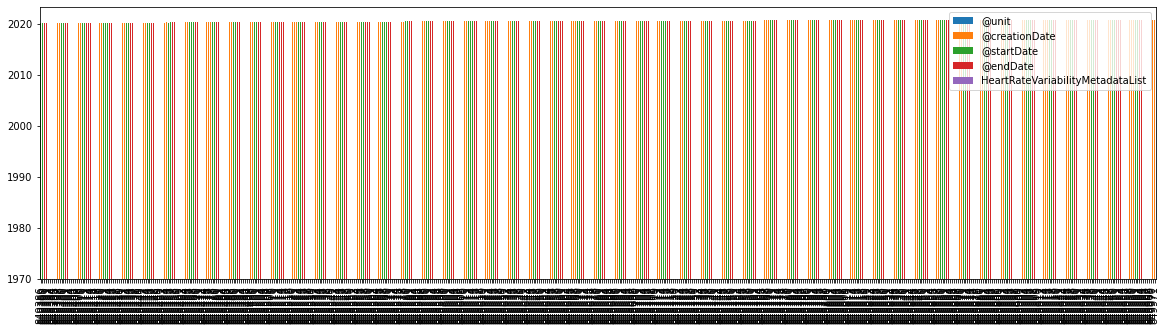

In [20]:
sleepduration.plot(kind='bar',figsize=(20,5))

In [21]:
sleepduration.to_csv('sleepduration_by_start.csv')